# Desafío 2: Rendimiento escolar

Preliminares
---

### Problema

El problema consiste en el desarrollo de un modelo predictivo de **regresión** para predecir, en base a atributos sociodemográficos y conductuales de alumnos, las notas de los alumnos.

A continuación se presenta el modelo a estimar:

$$Y={{\beta }_{0} + \sum_{i=1} {\beta }_{i} \cdot {X_{i}}}$$

Donde $X_{i}$ corresponden a los atributos sociodemográficos y conductuales, mientras que $Y$ es el vector objetivo a estimar (notas)

### Métricas de desempeño

Como este es un problema de regresión, se utilizarán las siguientes dos métricas:

- **Promedio del Error Cuadrático (Mean Squared Error)**: Representa la expectativa del error cuadrático. Es un indicador de calidad con valores no negativos, donde menores valores indican mejores niveles de ajuste.
- **R-cuadrado**: Representa la capacidad explicativa de nuestro conjunto de atributos en la variabilidad de nuestro vector objetivo.

### Descripción de la base de datos

- school : Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
- sex : Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre)
- age : Edad del estudiante. (numérica: de 15 a 22)
- address : Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural)
- famsize : Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus : Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados)
- Medu : Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- Fedu : Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- Mjob : Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- Fjob : Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- reason : Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra)
- guardian : Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro)
- traveltime : Tiempo de viaje entre hogar y colegio. (numeric: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora).
- studytime : Horas semanales dedicadas al estudio. (numérica: 1 - <2 horas, 2 - 2 a 5 horas, 3- 5 a 10 horas, o 4 - >10 horas)
- failures : Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4)
- schoolsup : Apoyo educacional del colegio. (binaria: si o no)
- famsup : Apoyo educacional familiar. (binaria: si o no)
- paid : Clases particulares pagadas (matemáticas o portugués) (binaria: si o no)
- activities : Actividades extracurriculares. (binaria: si o no)
- nursery : Asistió a guardería infantil. (binaria: si o no)
- higher : Desea proseguir estudios superiores (binaria: si o no)
- internet : Acceso a internet desde el hogar (binaria: si o no)
- romantic : Relación romántica (binaria: si o no)
- famrel : Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes)
- freetime : Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho)
- goout : Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas)
- Dalc : Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto)
- Walc : Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto)
- health : Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno)
- absences : Cantidad de ausencias escolares (numérica: de 0 a 93)
- G1 : Notas durante el primer semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo.
- G2 : Notas durante el segundo semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo.
- G3 : Promedio final (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo.

Aspectos computacionales
---

### Librerías a utilizar

- `pandas`: manipulación y análisis de datos.
- `numpy`: biblioteca de funciones matemáticas de alto nivel para operar con vectores o matrices.
- `scipy.stats`: contiene una gran cantidad de distribuciones de probabilidad y de funciones estadísticas.
- `matplotlib.pyplot`: nos permite mostrar gráficos.
- `seaborn`: librería especializada para gráficos estadísticos.
- `sklearn`: herramientas para análisis de datos y minería de datos. En particular se utilizará:
    - `linear_model`: módulo para trabajar con regresión donde el valor target es una combinación lineal de los features. Utilizaremos en este caso `LogisticRegression`.
    - `metrics`: módulo para obtener métricas de nuestros modelos (`mean_squared_error`, `r2_score`).
    - `model_selection`: de aquí se utilizará `train_test_split` para dividir nuestro datos en un set de entrenamiento y en un set de validación.
    - `preprocessing`: funciones para transformar datos en una representación más adecuada para los estimadores.
- `statsmodel`: provee clases y funciones para la estimación de distintos modelos estadísticos, así como para la realización de pruebas estadísticas y la exploración de datos estadísticos.
- `missingno`: librería para la visualización de datos perdidos.
- `factor_analyzer`: librería para el análisis factorial.
- `warnings`: será utilizada para evitar avisos de deprecación.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import factor_analyzer as factor
import missingno as msngo
import warnings

warnings.filterwarnings('ignore')

### Proceso de preprocesamiento y recodificación de datos

El proceso de preprocesamiento y recodificación de los datos consistirá en lo siguiente:

1. Análisis de cada columna (tipos de datos).
2. Resolución de anomalías.
3. Recodificación de las variables binarias como 0 y 1. Se asignará 1 a aquellas categorías minoritarias.
4. Recodificación de las variables nominales con más de 2 categorías.

### Funciones

- `binarize(df, column)`, función que dado un `df` (DataFrame) y un `column` (nombre de columna), retorna una copia del dataframe con una columna adicional con la variable binarizada (considerando el valor minoritario). La diferencia con `pd.get_dummies(df)` es que mantiene los valores `null`.
- `binarize_columns(df, columns)` devuelve un nuevo dataframe con todas todas las columnas en `columns` binarizadas.
- `dummierize_columns(data, columns)` devuelve un nuevo dataframe con nuevas columnas binarizadas para cada valor posible de las columnas `columns` entregadas.
- `describe_columns(df)`, función que dado un `DataFrame` `df` reporta las medidas descriptivas de cada columna. Para columnas con valores numéricos, utilizará `describe`, mientras para las columnas con atributos discretos utilizará `value_counts`.
- `plot_columns_behaviour(df)`, función que dado un `DataFrame` `df`, grafica histogramas para los atributos contínuos y gráficos de barra los discretos.

In [2]:
# Importar las funciones auxiliares
import auxiliary as nicos

In [3]:
original_df = pd.read_csv('students.csv', sep='|')
original_df.head(5)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,nulidade,U,GT3,A,4,4,at_home,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,2,GP,F,"""15""",U,LE3,T,1,1,at_home,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,4,GP,F,sem validade,U,GT3,T,3,3,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [4]:
# 1. Análisis de cada columna
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
Unnamed: 0    395 non-null int64
school        395 non-null object
sex           395 non-null object
age           395 non-null object
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null object
Fedu          395 non-null object
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null object
studytime     395 non-null object
failures      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null object
freetime      395 non-null object
goout       

In [5]:
# 2. Resolución de anomalías

# 2.1) Eliminar unnamed column
df1 = original_df.drop(columns=['Unnamed: 0'])

df1.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10


In [6]:
# 2.2) Para cada columna, reemplazar los casos perdidos
df2 = df1.copy()

numeric = [
    'age',
    'Medu',
    'Fedu',
    'traveltime',
    'studytime',
    'failures',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences',
    'G1',
    'G2',
    'G3',
]

for col_name in df2:
    missing = df2[col_name].isin(['nulidade', 'zero', 'sem validade'])
    missing_count = sum(missing)
    if missing_count > 0:
        if col_name in numeric:
            df2.loc[missing, col_name] = np.nan
        else:
            df2.loc[missing, col_name] = None

df2.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10


In [7]:
# 2.3) Columnas que son número pero que están como string
df3 = df2.copy()

for col_name in ['age', 'goout', 'health']:
    not_null = df3[col_name].notnull()
    df3.loc[not_null, col_name] = df3[not_null][col_name].apply(lambda n: int(n.replace('"', '')))
    
for col_name in numeric:
    not_nan = df3[col_name].notnull()
    df3.loc[not_nan, col_name] = df3[not_nan][col_name].astype('int')

df3.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,NaN,8,10


In [8]:
df = nicos.get_dummies(df3)
df.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_father,guardian_other,schoolsup_yes,famsup_no,paid_yes,activities_no,nursery_no,higher_no,internet_no,romantic_yes
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,0,0,1,1,0,0,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
5,16,4,3,1,2,0,5,4,2,1,...,0,0,0,0,1,0,0,0,0,0
6,16,2,2,1,2,0,4,4,4,1,...,0,0,0,1,0,1,0,0,0,0
7,17,4,4,2,2,0,4,1,4,1,...,0,0,1,0,0,1,0,0,1,0


Descripción
---

### Análisis de valores perdidos

Vamos a ver cómo se distribuyen los datos perdidos a lo largo del dataset:

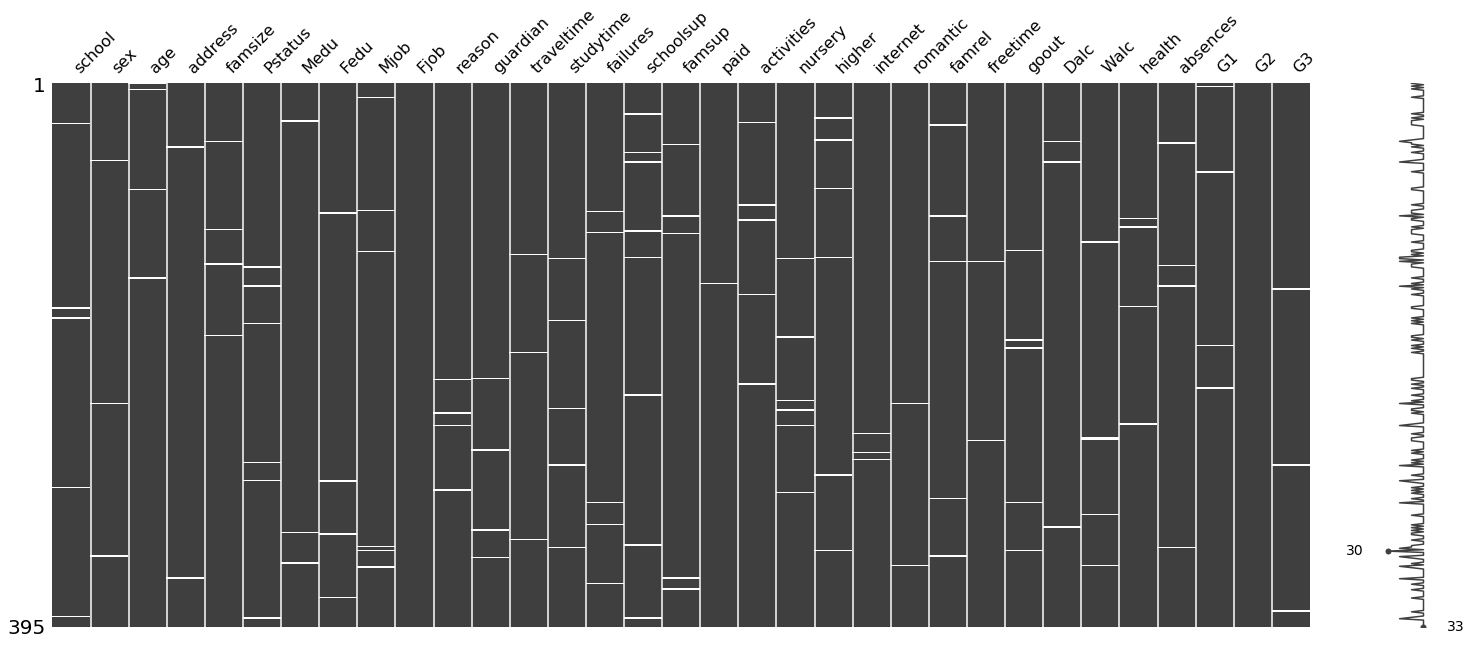

In [9]:
msngo.matrix(df3);

In [10]:
df3.isna().sum().sort_values(ascending=False).head(5)

schoolsup    8
higher       6
Pstatus      6
Mjob         6
nursery      6
dtype: int64

En general son pocos los datos perdidos para cada columna, pero, como aparece en el gráfico anterior, están repartido en distintas observaciones.

De hecho, si elimináramos las columnas con valores perdidos nos quedamos con un dataframe mucho más pequeño:

In [11]:
print('Perderíamos', df3.shape[0] - df3.dropna().shape[0])

Perderíamos 111


Perderíamos cerca del 30% de datos. Sin embargo, debido a la distribución de datos perdidos, parece ser la mejor opción para así no interferir con los resultados del modelo.

El dataframe final quedade la siguiente forma (obtenido en la sección anterior):

In [12]:
df.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_father,guardian_other,schoolsup_yes,famsup_no,paid_yes,activities_no,nursery_no,higher_no,internet_no,romantic_yes
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,0,0,1,1,0,0,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
5,16,4,3,1,2,0,5,4,2,1,...,0,0,0,0,1,0,0,0,0,0
6,16,2,2,1,2,0,4,4,4,1,...,0,0,0,1,0,1,0,0,0,0
7,17,4,4,2,2,0,4,1,4,1,...,0,0,1,0,0,1,0,0,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 42 columns):
age                  284 non-null int64
Medu                 284 non-null int64
Fedu                 284 non-null int64
traveltime           284 non-null int64
studytime            284 non-null int64
failures             284 non-null int64
famrel               284 non-null int64
freetime             284 non-null int64
goout                284 non-null int64
Dalc                 284 non-null int64
Walc                 284 non-null int64
health               284 non-null int64
absences             284 non-null int64
G1                   284 non-null int64
G2                   284 non-null int64
G3                   284 non-null int64
school_MS            284 non-null int64
sex_M                284 non-null int64
address_R            284 non-null int64
famsize_LE3          284 non-null int64
Pstatus_A            284 non-null int64
Mjob_services        284 non-null int64
Mjob_teacher   

### Análisis descriptivo

Ahora veremos un análisis descriptivo de las variables del dataset. 

Para esto, utilizaré el dataframe `df3` (aunque sin datos perdidos) el cual es igual al los datos original pero sin variables binarizadas. Esto es por facilidad para graficar la información.

In [14]:
data = df3.dropna().infer_objects()

### Inspección visual vector objetivo

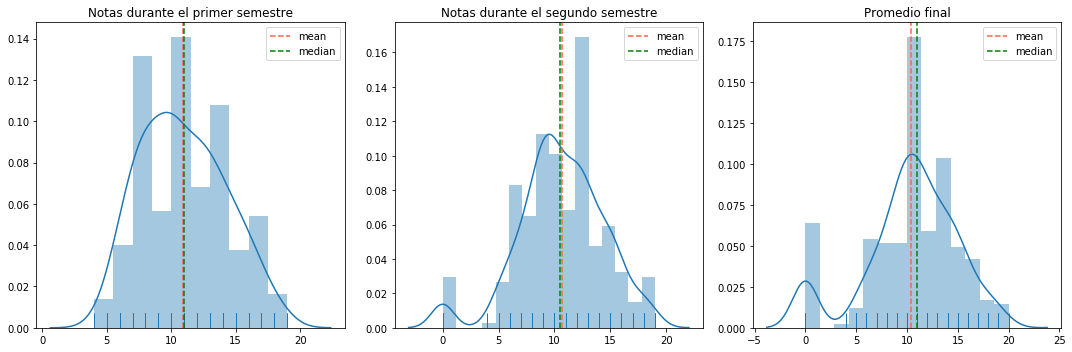

In [15]:
nicos.plot_columns_behaviour(data[['G1', 'G2', 'G3']], kind='numeric')

La media y la mediana en todos los vectores objetivos se ve muy similar, exceptuando el promedio final donde la frecuencia de promedios con 0 es mayor.

Para el promedio inicial, no hay observaciones con 0. Pero en el segundo semestre la frecuencia aumenta a 3% mientras que para el promedio final ésta se encuentra cercana a 6%.

### Inspeción visual de Variables

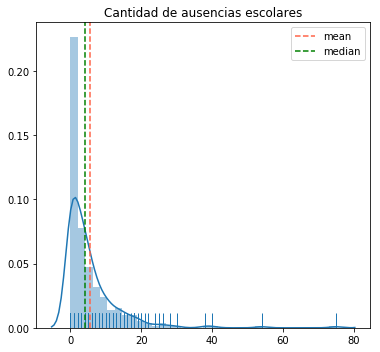

In [16]:
nicos.plot_columns_behaviour(data[['absences']], kind='numeric')

La cantidad de ausencias escolares se parece más a una expotencial, donde existen muchos alumnos sin ausencias, y a medida que aumentamos la cantidad de ausencias, la frecuencia disminuye considerablemente.

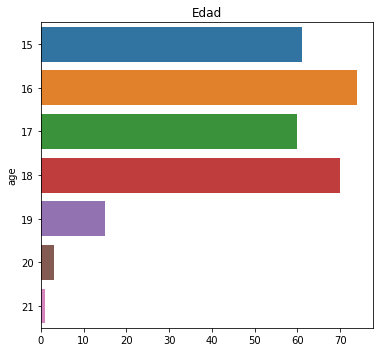

In [17]:
nicos.plot_columns_behaviour(data[['age']])

La edad si bien es numérica, queda mejor graficada con un `countplot` que con un histograma debido a que la cantidad de edades es bajo. 

Aquí la mayoría de alumnos tiene entre 15 y 18 años, mientras que unos pocos tienen edad 19 o más (los que probablemente hayan repetido alguna vez)

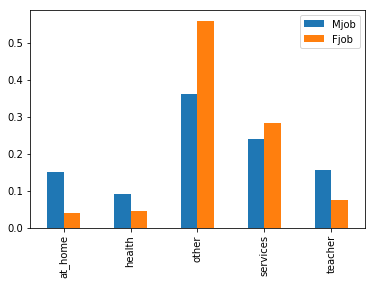

In [18]:
pd.concat([data['Mjob'].value_counts('%').to_frame(), data['Fjob'].value_counts('%').to_frame()], axis=1).plot.bar();

Comparativamente, las madres son las que mayoritariamente están en la casa (triplican la frecuencia comparado con los padres) y que trabajan principalmente en como profesoras o en algo relacionado a la salud (duplican en frecuencia comparado con los padres). Como la categoría de servicios está balanceada, los padres restantes están trabajando en otros tipos de trabajos.

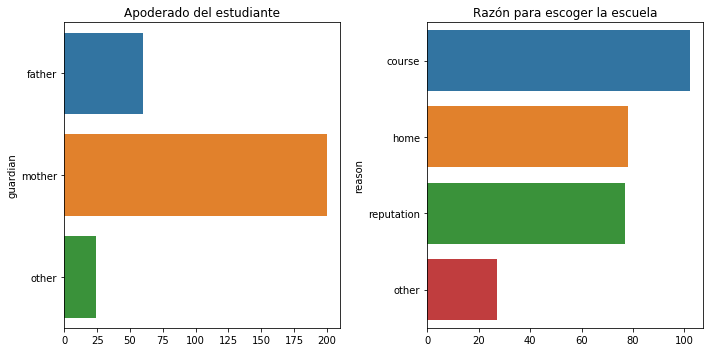

In [19]:
nicos.plot_columns_behaviour(data[['guardian', 'reason']])

La mayoría de apoderados son las madres, superando enormemente a las categorías de padre y de otros.

La razón para escoger la escuela está balanceado. La preferencia de cursos está en primer lugar, mientras que la reputación de la escuela y la cercanía con la casa están muy parecidas.

In [20]:
nicos.plot_columns_behaviour(data[binary_columns])

NameError: name 'binary_columns' is not defined

En cuanto a las variables binarias, hay variables que están o muy balanceadas o muy desbalanceadas.

**Balanceadas**:
    
- Apoyo educacional familiar
- Clases particulares
- Actividades extracurriculares
- Sexo el estudiante

Para cada una de estas variables, aproximadamente la mitad de observaciones son `si` y la otra mitad son `no`.

**No balanceadas**:

- Apoyo educacional en el colegio: son pocos los que dicen haber tenido apoyo.
- Asistió a guardería infantil: la mayoría si asistió a guardería
- Desea proseguir estudios superiores: la mayoría desea proseguir con estudios superiores
- Acceso a internet desde el hogar: la mayoría tiene acceso a internet
- Relación romántica: la mayoría no tiene relaciones románticas
- Escuela del estudiante: la mayoría de las observaciones son de la escuela Gabriel Pereira
- Ubicación casa del estudiante: la mayoría está en zonas urbanas
- Tamaño de la familia: la mayoría vive con familia de tamaño mayor o igual a 3
- Estado cohabitacional de los padres: la mayoría de los padres de los estudiantes viven juntos

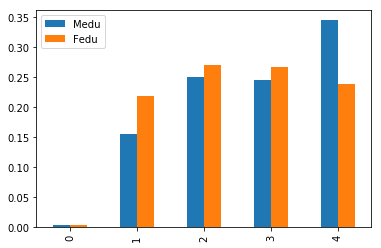

In [21]:
pd.concat([data['Medu'].value_counts('%').to_frame(), data['Fedu'].value_counts('%').to_frame()], axis=1).plot.bar();

Porcentualmente, las madres de los alumnos tienen un mayor nivel educacional en comparación a los padres.

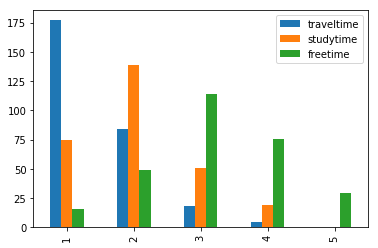

In [22]:
value_count_dfs = [data[x].value_counts().to_frame() for x in ['traveltime', 'studytime', 'freetime']]
pd.concat(value_count_dfs, axis=1).plot.bar();

- La mayoría de alumnos considera que tiene mucho tiempo libre
- La mayoría de alumnos considera que el tiempo de viaje al colegio es poco (< 15 minutos)
- La mayoría de alumnos considera que estudia poco (<3 horas)

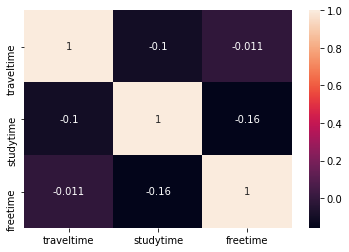

In [23]:
sns.heatmap(data[['traveltime', 'studytime', 'freetime']].corr(), annot=True);

Viendo las correlaciones entre estas tres, en realidad se ve una baja correlación entre estas variables. Cabe destacar que si bien hay poca, entre todas es negativa (mayor tiempo de viaje, menor tiempo de estudio).

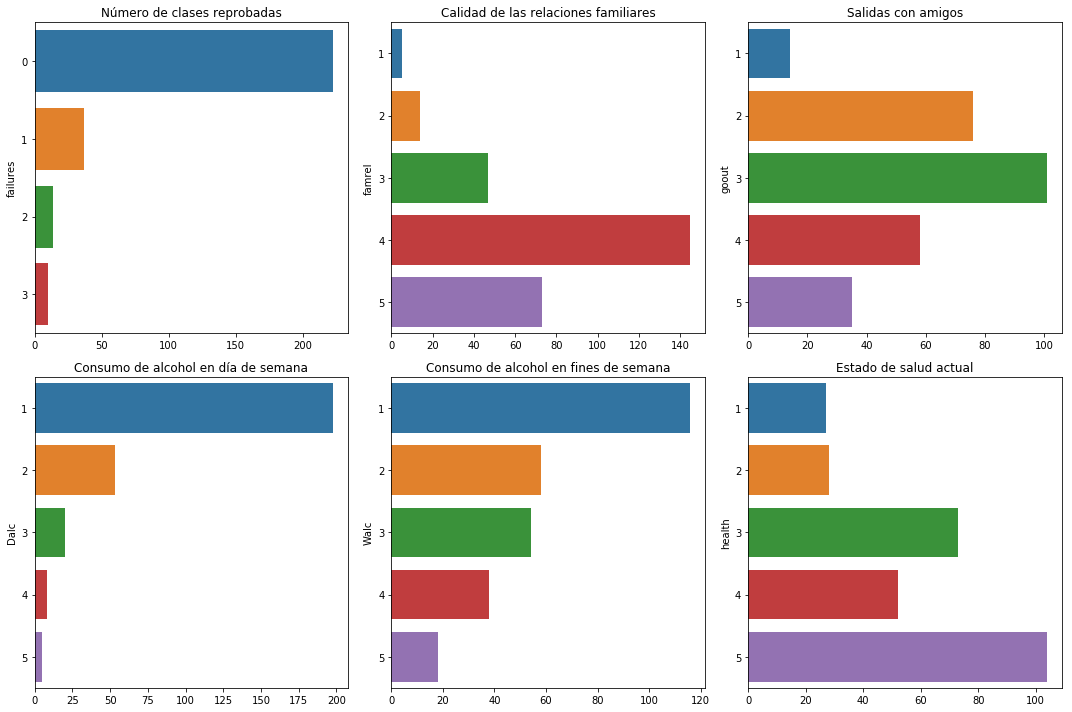

In [24]:
rest_of_colums = [
    'failures',
    'famrel',
    'goout',
    'Dalc',
    'Walc',
    'health',
]

nicos.plot_columns_behaviour(data[rest_of_colums])

- Si bien la mayoría de los alumnos no toma alcohol durante la semana, la distribución cambia cuando vemos el consumo de alchool los fines de semana.
- En cuanto a salud, la mayoría indica estar bien
- Las salidas con alumnos se ve que distribuye normal
- El número de clases reprobadas para la mayoría es 0
- La mayoría dice tener buenas relaciones familiares

La matriz de correlación entre las variables que tienen que ver con el consumo de alcohol:

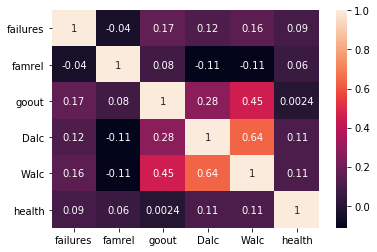

In [25]:
sns.heatmap(data[rest_of_colums].corr(), annot=True);

Al ver las correlaciones más altas podemos decir que:

- La correlación entre consumo de alchool en la semana y el fin de semana es > 0.5, lo cual tiene sentido pues alguien que toma en la semana es probable que también tome el fin de semana.
- Las salidas con amigos pueden influir en un aumento en de consumo de alchool, sobretodo los fin de semana (aunque la correlación es < 0.5)

De estas correlaciones, la más significativa es consumo de alcohol en la semana y el fin de semana.

Si vemos los promedios de estas variables:

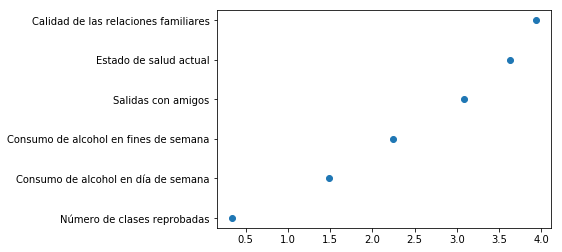

In [26]:
variable = []
mean = []

for colname, serie in data[rest_of_colums].iteritems():
    variable.append(nicos.humanize(colname))
    mean.append(serie.mean())

df_mean = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.plot(df_mean['mean'], df_mean['var'],'o');

Un sujeto promedio tendería a tener "buenos" indicadores: buena relación con los familiares, buen estado de salud actal, salidas con amigos, bajo consumo de alcohol durante la semana, sin clases reprobadas y un consumo moderado de alcohol el fin de semana.

### Inspección visual de coreaciones entre vector objetivo y otras variables

Las principales correlaciones (a nivel global) las podemos ver en la siguiente imagen:

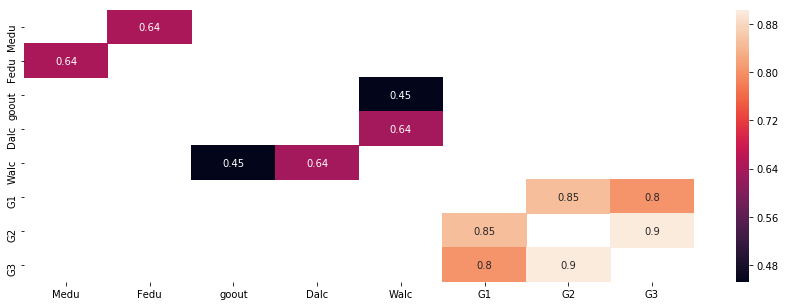

In [27]:
nicos.plot_main_correlations(data[numeric], 0.4)

Nada fuera de lo común:

- Hay una alta correlación entre G2 y G3, así como entre G1 y G2. La nota final debería depender de la nota de los dos primeros semestres.
- Existe una correlación entre nivel educacional de los padres y madres.
- Como vimos anteriormente, existe correlación entre beber alcohol en la semana y los fin de semanas, así como también salir con amigos con beber alchohol.

Mientras que las correlaciones más pequeñas (respecto a las notas) son:

In [28]:
M = data[numeric].corr()
threshold = 0.1
worst_corr = M[((M < threshold) & (M > -threshold))
              ].dropna(axis=0, how='all').dropna(axis=1, how='all')
worst_corr[['G1', 'G2', 'G3']].dropna(how='all')

,G1,G2,G3
age,-0.042289,NaN,NaN
traveltime,-0.078746,NaN,-0.091532
studytime,NaN,0.092907,0.066506
famrel,0.033950,-0.003285,0.069963
freetime,0.026875,0.011904,0.037968
Dalc,-0.080415,-0.061280,-0.052820
Walc,NaN,-0.079485,-0.033601
absences,-0.055033,-0.056140,0.013487


**¿Cómo varía el vector objetivo con las variables categóricas o binarias?**

Los siguientes gráficos muestran la distribución de cada nota en distintos grupos para las variables binarias pero sólo se muestran cuando existe suficiencia estadística para rechazar la hipótesis nula de que las medias son iguales en ambos grupos.

Usamos ahora el dataset que tenemos con todas las variables binarizadas:

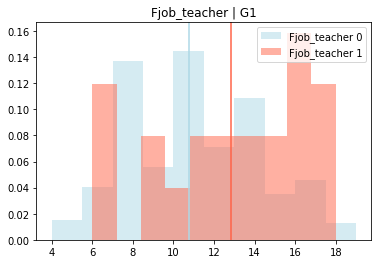

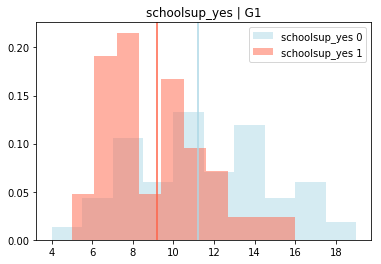

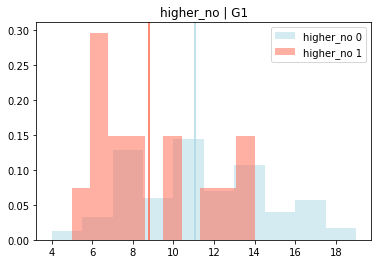

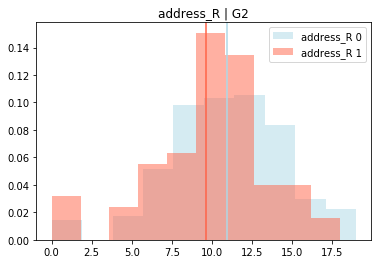

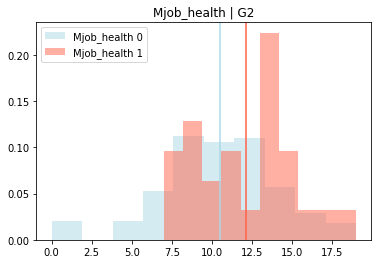

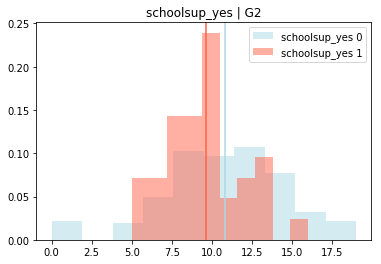

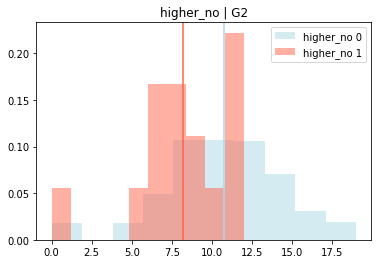

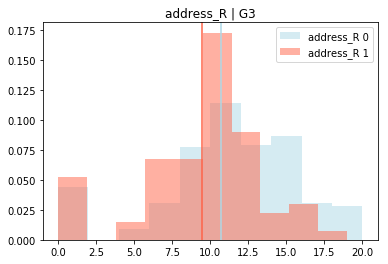

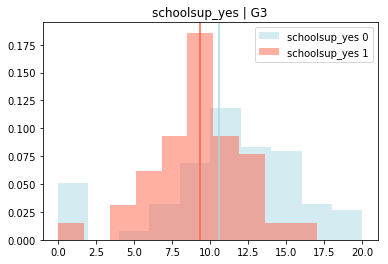

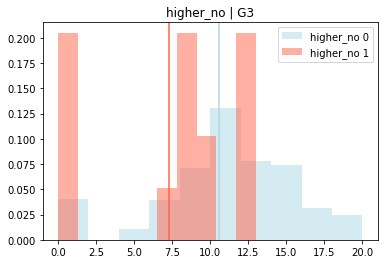

In [32]:
for grades in ['G1', 'G2', 'G3']:
    for binary in df.loc[:, 'school_MS': 'romantic_yes']:
        different_mean = nicos.run_hip_test(df, grades, binary)
        if different_mean:
            nicos.graph_hist(df, grades, binary)

**Observaciones**:

- Al parecer los alumnos que viven en zonas urbanas tienen mejor promedio en comparación con los que no viven en zonas urbanas.
- Los alumnos que quieren continuar con estudios superiores tienen mejor promedio en comparación con los que no.
- Por alguna razón, el promedio de la nota en el grupo de alumnos que prefirió un colegio por cursos es menor que en el resto.
- Los alumnos que dicen tener apoyo de la escuela tienen mayor promedio.

**¿Cómo se ven las principales correlaciones en el conjunto completo?**

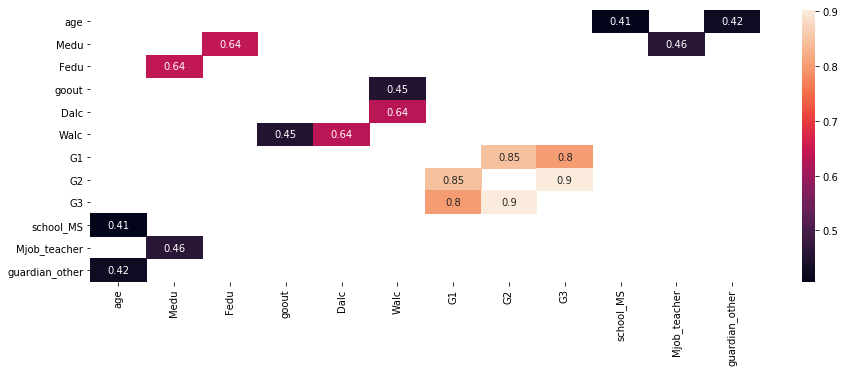

In [33]:
nicos.plot_main_correlations(df)

No se ve ninguna correlación importante para las notas, aunque muchos de los atributos son `boolean` (la correlación de Pearson no funciona muy bien en este caso).

Modelación descriptiva
---

TODO:

- Elementos a considerar en éste hito:
    - La modelación mediante regresión de ambos problemas. (2 puntos)
    - La interpretación de los principales regresores en cada problema. (2 puntos)
    - La definición de las estrategias de Modelación predictiva. (1 punto)

### Modelación de regresión

In [34]:
def build_model(df, target, *banned_columns):
    regressors = [item for item in df.columns if item not in banned_columns]
    return smf.ols('{} ~ {}'.format(target, ' + '.join(regressors)), df)

In [35]:
saturated_model = build_model(df, 'G3', 'G1', 'G2', 'G3').fit()
saturated_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     2.831
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           6.14e-07
Time:                        18:06:59   Log-Likelihood:                -780.76
No. Observations:                 284   AIC:                             1642.
Df Residuals:                     244   BIC:                             1787.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.5320      4.796      2.404      0.017       2.085      20.979
age                  -0.1608      0.260     -0.618      0.537      -0.673       0.352
Medu                  0.5017      0.397      1.265      0.207      -0.279       1.283
Fedu                 -0.3060      0.333     -0.920      0.358      -0.961       0.349
traveltime           -0.1333      0.409     -0.326      0.745      -0.940       0.673
studytime             0.3779      0.345      1.094      0.275      -0.302       1.058
failures             -1.4767      0.398     -3.713      0.000      -2.260      -0.693
famrel                0.4857      0.300      1.621      0.106      -0.105       1.076
freetime              0.4721      0.271      1.739      0.083      -0.063       1.007
goout                -1.2396      0.280     -4.434      0.000      -1.790      -0.689
Dalc                 -0.5493      0.402     -1.365      0.174      -1.342       0.243
Walc                  0.7566      0.295      2.562      0.011       0.175       1.338
health               -0.3936      0.199     -1.976      0.049      -0.786      -0.001
absences              0.0336      0.034      0.977      0.329      -0.034       0.101
school_MS             0.9206      0.938      0.981      0.327      -0.927       2.769
sex_M                 1.0108      0.608      1.663      0.098      -0.186       2.208
address_R            -0.8873      0.686     -1.294      0.197      -2.238       0.463
famsize_LE3           0.3597      0.620      0.580      0.562      -0.861       1.580
Pstatus_A             1.0103      0.916      1.103      0.271      -0.793       2.814
Mjob_services         0.4771      0.735      0.649      0.517      -0.971       1.925
Mjob_teacher         -1.3098      0.990     -1.323      0.187      -3.260       0.640
Mjob_at_home         -0.2651      0.842     -0.315      0.753      -1.924       1.393
Mjob_health           1.0952      1.113      0.984      0.326      -1.096       3.287
Fjob_services         0.8480      0.663      1.280      0.202      -0.457       2.153
Fjob_teacher          2.1982      1.120      1.963      0.051      -0.008       4.404
Fjob_health           0.7621      1.340      0.569      0.570      -1.878       3.402
Fjob_at_home          1.4023      1.386      1.012      0.313      -1.327       4.132
reason_home           0.2428      0.665      0.365      0.715      -1.067       1.553
reason_reputation     0.9431      0.686      1.375      0.171      -0.408       2.295
reason_other          0.9620      0.951      1.012      0.313      -0.911       2.835
guardian_father      -0.2893      0.674     -0.429      0.668      -1.617       1.038
guardian_other       -0.6460      1.101     -0.587      0.558      -2.815       1.523
schoolsup_yes        -1.0615      0.794     -1.337      0.182      -2.625

`R-squared` es de 31% para el modelo saturado, es decir, todos los atributos explican `G3` en un 31%. `Adj. R-squared`, el cual penaliza el resultado de `R-squared` por el número de regresores, es de 20%, así que es posible que existan variables que no estén aportando en el modelo.

Al ver el valor de los regresores, existen varios que tienen pvalues muy altos. Por ejemplo:

In [39]:
def not_significant_pvalues(model):
    return model.pvalues[model.pvalues > 0.025]

pvalues = not_significant_pvalues(saturated_model)
pvalues.T

age                  0.537203
Medu                 0.207065
Fedu                 0.358343
traveltime           0.745010
studytime            0.274997
famrel               0.106401
freetime             0.083258
Dalc                 0.173528
health               0.049294
absences             0.329334
school_MS            0.327470
sex_M                0.097523
address_R            0.196769
famsize_LE3          0.562202
Pstatus_A            0.270910
Mjob_services        0.516991
Mjob_teacher         0.187085
Mjob_at_home         0.753133
Mjob_health          0.325923
Fjob_services        0.201757
Fjob_teacher         0.050836
Fjob_health          0.570102
Fjob_at_home         0.312544
reason_home          0.715395
reason_reputation    0.170504
reason_other         0.312676
guardian_father      0.668119
guardian_other       0.557963
schoolsup_yes        0.182437
famsup_no            0.106409
paid_yes             0.354395
activities_no        0.231826
nursery_no           0.894994
higher_no 

Para todos estos regresores, al 95% de significancia, no hay evidencia suficiente para rechazar la hipótesis nula de que el valor del regresor sea 0.

Por lo tanto, todos estos son candidatos a ser eliminados. A continuación crearemos un modelo sin estos:

In [40]:
model2 = build_model(df, 'G3', 'G1', 'G2', 'G3', *list(pvalues.index)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     17.52
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.89e-10
Time:                        18:08:44   Log-Likelihood:                -809.34
No. Observations:                 284   AIC:                             1627.
Df Residuals:                     280   BIC:                             1641.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0309      0.770     16.922      0.000      11.515      14.547
failures      -2.0436      0.349     -5.859      0.000      -2.730      -1.357
goout         -0.9345      0.262     -3.562      0.000      -1.451      -0.418
Walc           0.4150      0.219      1.892      0.059      -0.017       0.847
==============================================================================
Omnibus:                       17.129   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.559
Skew:                          -0.577   Prob(JB):                     9.33e-05
Kurtosis:                       3.488   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Esta vez, el `R-squared` es 20%, cercano al valor ajustado del modelo anterior. Notar que el ajustado sigue siendo un poco menor (18%), y que existen algunos regresores que al 95% no son significantes.

In [41]:
pvalues2 = not_significant_pvalues(model2)
pvalues2.T

Walc    0.059461
dtype: float64

Volveremos a excluir estos atributos

In [42]:
model3 = build_model(df, 'G3', *['G1', 'G2', 'G3'], *list(pvalues.index), *list(pvalues2.index)).fit()

In [43]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     24.26
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.91e-10
Time:                        18:08:54   Log-Likelihood:                -811.15
No. Observations:                 284   AIC:                             1628.
Df Residuals:                     281   BIC:                             1639.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2692      0.763     17.387      0.000      11.767      14.772
failures      -1.9836      0.349     -5.685      0.000      -2.670      -1.297
goout         -0.7169      0.237     -3.026      0.003      -1.183      -0.251
==============================================================================
Omnibus:                       23.948   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.829
Skew:                          -0.692   Prob(JB):                     9.06e-07
Kurtosis:                       3.659   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Todos los regresores de este tercer modelo son significantes al 95%. Observamos que:

- `R-squared` es ~`15%`.
- `Adj. R-squared` es ~`14%`.

Es similar al modelo anterior pero con menos atributos.

Hacemos el mismo procedimiento para G1 y G2

In [44]:
models = {}

for target in ['G1', 'G2']:
    banned_coefs = []
    for i in range(1, 4):
        model = build_model(df, target, 'G1', 'G2', 'G3', *banned_coefs).fit()
        worst_p_values = list(not_significant_pvalues(model).index)
        for coef in worst_p_values:
            banned_coefs.append(coef)
        models[target + '_' + str(i)] = model

In [45]:
models['G1_3'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           3.64e-13
Time:                        18:09:00   Log-Likelihood:                -708.02
No. Observations:                 284   AIC:                             1426.
Df Residuals:                     279   BIC:                             1444.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.1936      0.548     24.069      0.000      12.115      14.273
failures         -1.3059      0.244     -5.357      0.000      -1.786      -0.826
goout            -0.5424      0.166     -3.267      0.001      -0.869      -0.216
Fjob_teacher      1.8159      0.673      2.697      0.007       0.490       3.141
schoolsup_yes    -2.1287      0.516     -4.126      0.000      -3.144      -1.113
==============================================================================
Omnibus:                        5.648   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.053
Skew:                           0.155   Prob(JB):                        0.132
Kurtosis:                       2.504   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
models['G2_3'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     16.82
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           4.48e-10
Time:                        18:09:02   Log-Likelihood:                -757.28
No. Observations:                 284   AIC:                             1523.
Df Residuals:                     280   BIC:                             1537.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4578      0.854     16.923      0.000      12.776      16.140
failures      -1.4542      0.290     -5.008      0.000      -2.026      -0.883
goout         -0.6503      0.196     -3.311      0.001      -1.037      -0.264
health        -0.3653      0.159     -2.302      0.022      -0.678      -0.053
==============================================================================
Omnibus:                       13.056   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.434
Skew:                          -0.443   Prob(JB):                     0.000734
Kurtosis:                       3.660   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretación de los principales regresores

Existen dos regresores que se encuentran en todas las notas:

- `failures`: cantidad de cursos reprobados.
- `goout`: salidas con amigos.

#### Notas primer semeste (G1)

#### Notas segundo semeste (G2)

#### Nota final (G3)

In [49]:
numeric2 = [
    'Medu',
    'Fedu',
    'traveltime',
    'studytime',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
]

df_b = nicos.get_dummies(df, numeric2)

models2 = {}

for target in ['G1', 'G2', 'G3']:
    banned_coefs = []
    for i in range(1, 4):
        model = build_model(df_b, target, 'G1', 'G2', 'G3', *banned_coefs).fit()
        worst_p_values = list(not_significant_pvalues(model).index)
        for coef in worst_p_values:
            banned_coefs.append(coef)
        models2[target + '_' + str(i)] = model

models2['G3_3'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     17.62
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.67e-10
Time:                        18:12:40   Log-Likelihood:                -809.21
No. Observations:                 284   AIC:                             1626.
Df Residuals:                     280   BIC:                             1641.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0677      0.289     38.346      0.000      10.500      11.636
failures      -2.0799      0.352     -5.912      0.000      -2.772      -1.387
freetime_5     2.7398      0.866      3.165      0.002       1.036       4.444
goout_5       -2.0883      0.813     -2.570      0.011      -3.688      -0.489
==============================================================================
Omnibus:                       21.168   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.943
Skew:                          -0.645   Prob(JB):                     6.32e-06
Kurtosis:                       3.599   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""